In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Microbiome

In [2]:
instruments = pd.read_table('../data/instrument.txt', index_col=0)
phenotype = pd.read_table('../data/phenotype.txt', index_col=0)

In [3]:
confounder = pd.read_csv('../data/cleaned-data/microbiome_confounder.csv', index_col=0)
family = pd.read_csv('../data/cleaned-data/microbiome_family.csv', index_col=0)
instrument = pd.read_csv('../data/cleaned-data/microbiome_instrume.csv', index_col=0)
outcome = pd.read_csv('../data/cleaned-data/microbiome_outcome.csv', index_col=0)

outcome.index = family.index # fingers crossed!
instrument.index = family.index 
confounder.index = family.index 

In [4]:
microbeV = pd.read_excel('../results/microbiome_analysis_family.xlsx', sheet_name='Figure V', index_col=0)

Text(0.5, 1.0, 'V2 : Dietary Instrumental Variable')

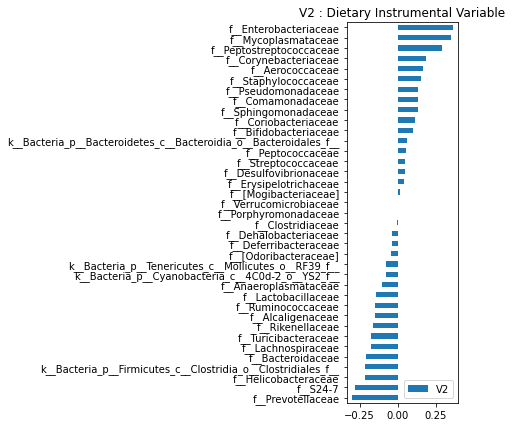

In [5]:
fig, ax = plt.subplots(figsize=(2, 7))
microbe_v2_ranks = microbeV['V2'].sort_values()
pd.DataFrame(microbe_v2_ranks).plot.barh(ax=ax)
ax.set_title('V2 : Dietary Instrumental Variable')

In [6]:
denom = microbe_v2_ranks.loc[microbe_v2_ranks < 0].index
num = microbe_v2_ranks.loc[microbe_v2_ranks > 0].index
v2 = pd.DataFrame({'v2_balance' : np.log(family[num] + 1).mean(axis=1) - np.log(family[denom] + 1).mean(axis=1)})

In [7]:
microbe_md = pd.merge(outcome, v2, left_index=True, right_index=True)
microbe_md = pd.merge(microbe_md, confounder, left_index=True, right_index=True)
microbe_md = pd.merge(microbe_md, instruments, left_index=True, right_index=True)

In [8]:
instruments.columns

Index(['L1', 'Antibiotic', 'TGFbRff', 'PIGRHe', 'NC', 'RagkMupHe', 'B', 'aPD',
       'HFD', 'PIGRK', 'IgAkMup', 'JH', 'B6', 'Ighel/MD4', 'STAM', 'IgAk',
       'Oxali', 'Oxali+aPD', 'LALAPG', 'FVB', 'IgMkMup', 'MupHe', 'CD8k',
       'CD8kMup', 'TGFbR'],
      dtype='object')

In [9]:
outcome.columns

Index(['no IgA', 'obese', 'NASH', 'HCC', 'T1d', 'mon B cells', 'no B cell',
       'no T cell', 'lean', 'no IgM', 'adenomas'],
      dtype='object')

In [10]:
microbe_md

,no IgA,obese,NASH,HCC,T1d,mon B cells,no B cell,no T cell,lean,no IgM,...,IgAk,Oxali,Oxali+aPD,LALAPG,FVB,IgMkMup,MupHe,CD8k,CD8kMup,TGFbR
10856.B6.IgAK.Feces.8w.NC.2.11,1,0,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
10856.E27L.feces.47w.HFD.CD8kCLM.1.17,0,1,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
10856.E12L.feces.36w.HFD.CD4HeMup.19,0,1,1,1,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
10856.E15L.feces.45w.HFD.IgACLM.1.5,1,1,0,0,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
10856.E17L.feces.42w.HFD.CD4HeCLM.1.9,0,1,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10856.E14L.feces.39w.ANB.HFD.IgAk.MupHe.2.12,1,1,1,1,0,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
10856.E14L.feces.41w.ANB.HFD.MupHe.2.6,0,1,1,1,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
10856.E42L.feces.47w.ANB.HFD.CD8kMup.2.2,0,1,1,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,True,False
10856.E5La.feces.27wAntibiotic.HFD.MupHe.9,0,1,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False


Text(0.5, 0, 'obesity')

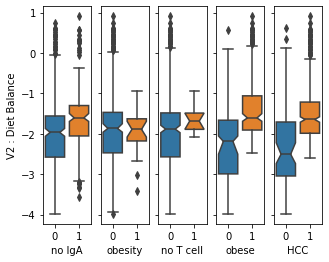

In [11]:
fig, ax = plt.subplots(1, 5, sharey=True, figsize=(5, 4))

sns.boxplot(data=microbe_md, y='v2_balance', x='no IgA', notch=True, ax=ax[0], bootstrap=1000)
sns.boxplot(data=microbe_md, y='v2_balance', x='no B cell', notch=True, ax=ax[1], bootstrap=1000)
sns.boxplot(data=microbe_md, y='v2_balance', x='no T cell', notch=True, ax=ax[2], bootstrap=1000)
sns.boxplot(data=microbe_md, y='v2_balance', x='obese', notch=True, ax=ax[3], bootstrap=1000)
sns.boxplot(data=microbe_md, y='v2_balance', x='HCC', notch=True, ax=ax[4], bootstrap=1000)

ax[0].set_ylabel('V2 : Diet Balance')
for i in range(1, 5):
    ax[i].set_ylabel('')
ax[1].set_xlabel('obesity')

Text(0.5, 0, 'Obese')

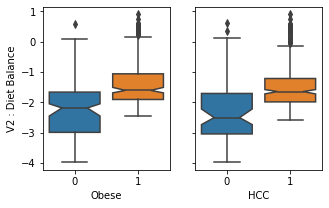

In [12]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(5, 3))

sns.boxplot(data=microbe_md, y='v2_balance', x='obese', notch=True, ax=ax[0], bootstrap=1000)
sns.boxplot(data=microbe_md, y='v2_balance', x='HCC', notch=True, ax=ax[1], bootstrap=1000)

ax[0].set_ylabel('V2 : Diet Balance')
ax[1].set_ylabel('')
ax[0].set_xlabel('Obese')


Comparison against DESeq2 (both loadings and balances)

In [13]:
!ls ../results

deseq2.csv                             microbe_metabolites_analysis.txt
deseq2_family.csv                      microbiome_analysis_family.xlsx
deseq2_genus.csv                       microbiome_analysis_nbfar.txt
deseq_metabolites.csv                  microbiome_analysis_nbfar_family2.txt
metabolite_ranks.csv                   microbiome_analysis_nbfar_family2.xlsx
metabolites_analysis (1).txt           microbiome_analysis_nbfar_genus2.txt
metabolites_analysis (1).xlsx          microbiome_analysis_nbfar_genus2.xlsx
metabolites_analysis (2).xlsx          microbiome_ranks.csv
metabolites_analysis.txt               mmvec
metabolites_analysis.xlsx              ~$metabolites_analysis (2).xlsx
microb_metabolites_analysis (1).xlsx   ~$microb_metabolites_analysis (1).xlsx
microb_metabolites_analysis.xlsx


In [14]:
deseq2 = pd.read_csv('../results/deseq2_family.csv', index_col=0)

In [15]:
deseq2_obese = deseq2.loc[deseq2['Phenotype'] == 'obese']
deseq2_obese = deseq2_obese.set_index('Variable')


deseq2_HCC = deseq2.loc[deseq2['Phenotype'] == 'HCC']
deseq2_HCC = deseq2_HCC.set_index('Variable')

Text(0, 0.5, 'DEseq2 obese')

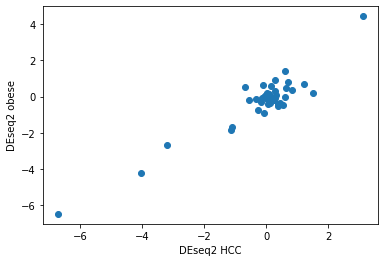

In [16]:
plt.scatter(deseq2_HCC.loc[deseq2_obese.index, 'log2FoldChange'], 
            deseq2_obese['log2FoldChange'])
plt.xlabel('DEseq2 HCC')
plt.ylabel('DEseq2 obese')

/var/folders/w2/6wc3tcs56jl0x12ct8r03pf5h8vjhg/T/ipykernel_83080/793086758.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ax[0].scatter(deseq2_obese.loc[common_taxa, 'log2FoldChange'],
/var/folders/w2/6wc3tcs56jl0x12ct8r03pf5h8vjhg/T/ipykernel_83080/793086758.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  microbe_v2_ranks.loc[common_taxa])
/var/folders/w2/6wc3tcs56jl0x12ct8r03pf5h8vjhg/T/ipykernel_83080/793086758.py:12: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ax[1].scatter(deseq2_HCC.loc[common_taxa, 'log2FoldChange'],
/var/folders/w2/6wc3tcs56jl0x12ct8r03pf5h8vjhg/T/ipykernel_83080/793086758.py:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  microbe_v2_ranks.loc[common_taxa])


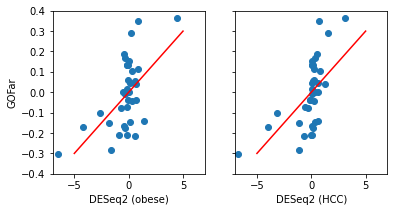

In [17]:
common_taxa = set(microbe_v2_ranks.index) & set(deseq2_obese.index)
fig, ax = plt.subplots(1, 2, figsize=(6, 3), sharey=True)
ax[0].scatter(deseq2_obese.loc[common_taxa, 'log2FoldChange'], 
              microbe_v2_ranks.loc[common_taxa])
ax[0].set_xlabel('DESeq2 (obese)')
ax[0].set_ylabel('GOFar')
ax[0].set_xlim([-7, 7])
ax[0].set_ylim([-0.4, 0.4])
ax[0].plot([-5, 5], [-0.3, 0.3], 'r')

common_taxa = set(microbe_v2_ranks.index) & set(deseq2_HCC.index)
ax[1].scatter(deseq2_HCC.loc[common_taxa, 'log2FoldChange'], 
              microbe_v2_ranks.loc[common_taxa])
ax[1].set_xlabel('DESeq2 (HCC)')
#ax[1].set_ylabel('GOFar')
ax[1].set_xlim([-7, 7])
ax[1].set_ylim([-0.4, 0.4])
ax[1].plot([-5, 5], [-0.3, 0.3], 'r')

In [18]:
pd.merge(deseq2_obese, deseq2_HCC, left_index=True, right_index=True)

,Phenotype_x,baseMean_x,log2FoldChange_x,lfcSE_x,stat_x,pvalue_x,padj_x,Phenotype_y,baseMean_y,log2FoldChange_y,lfcSE_y,stat_y,pvalue_y,padj_y
Variable,,,,,,,,,,,,,,
f__Thermaceae,obese,5.592934,0.182754,0.093548,1.953593,5.074933e-02,1.172484e-01,HCC,5.592934,0.032737,0.093256,0.351039,7.255592e-01,9.977790e-01
f__Corynebacteriaceae,obese,6.414081,-0.457275,0.096481,-4.739549,2.141946e-06,1.195920e-05,HCC,6.414081,0.544989,0.094492,5.767586,8.041513e-09,8.363173e-08
f__Microbacteriaceae,obese,3.064995,0.021217,0.083213,0.254979,7.987395e-01,9.029913e-01,HCC,3.064995,-0.014709,0.082618,-0.178040,8.586919e-01,9.977790e-01
f__Micrococcaceae,obese,8.108435,0.013740,0.051270,0.268000,7.886997e-01,9.029913e-01,HCC,8.108435,-0.009762,0.050905,-0.191773,8.479201e-01,9.977790e-01
f__Mycobacteriaceae,obese,5.134770,0.027349,0.064455,0.424310,6.713401e-01,8.921058e-01,HCC,5.134770,0.013331,0.064049,0.208135,8.351237e-01,9.977790e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f__Anaeroplasmataceae,obese,15.297188,-2.677421,0.182470,-14.673237,9.567017e-49,1.602475e-47,HCC,18.174608,-3.196286,0.177487,-18.008562,1.669074e-72,5.786123e-71
f__Mycoplasmataceae,obese,4.097465,0.827832,0.118641,6.977595,3.002767e-12,2.235393e-11,HCC,4.097465,0.700240,0.120265,5.822499,5.797432e-09,7.277249e-08
k__Bacteria_p__Tenericutes_c__Mollicutes_o__RF39_f__,obese,59.322828,-0.197579,0.126424,-1.562831,1.180924e-01,2.327114e-01,HCC,59.322828,-0.553001,0.123197,-4.488756,7.164019e-06,5.731216e-05


In [19]:
deseq2_obese.loc[common_taxa].sort_values('log2FoldChange')

/var/folders/w2/6wc3tcs56jl0x12ct8r03pf5h8vjhg/T/ipykernel_83080/2845342575.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  deseq2_obese.loc[common_taxa].sort_values('log2FoldChange')


,Phenotype,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Variable,,,,,,,
f__Prevotellaceae,obese,943.606907,-6.475883,0.209017,-30.982543,9.264591e-211,6.207276e-209
f__Turicibacteraceae,obese,26.366324,-4.211498,0.222077,-18.964107,3.377123e-80,7.542241e-79
f__Anaeroplasmataceae,obese,15.297188,-2.677421,0.182470,-14.673237,9.567017e-49,1.602475e-47
f__Alcaligenaceae,obese,170.679164,-1.841494,0.186844,-9.855804,6.469674e-23,7.224469e-22
f__S24-7,obese,5511.701635,-1.669445,0.123200,-13.550699,7.847959e-42,1.051626e-40
f__Bacteroidaceae,obese,2019.235382,-0.918044,0.132566,-6.925206,4.353405e-12,2.916782e-11
k__Bacteria_p__Cyanobacteria_c__4C0d-2_o__YS2_f__,obese,24.179755,-0.743346,0.088092,-8.438311,3.219572e-17,2.696391e-16
f__Porphyromonadaceae,obese,751.869130,-0.535650,0.163358,-3.278989,1.041799e-03,3.877807e-03
f__Corynebacteriaceae,obese,6.414081,-0.457275,0.096481,-4.739549,2.141946e-06,1.195920e-05


# Metabolomics

In [20]:
import biom
metabolites = biom.load_table('../data/hcc-data/metabolites.biom').to_dataframe().T
metabolite_md = pd.read_table('../data/hcc-data/metabolite_feature_metadata.txt', index_col=0)
metaboliteV = pd.read_excel('../results/metabolites_analysis.xlsx', sheet_name='Figure V', index_col=0)
metabolite_md = metabolite_md.reset_index().dropna(subset=['Compound_Name'])
metabolite_md.index = metaboliteV.index

metabolites = metabolites[metabolite_md['sampleid'].values]
metabolites.columns = metabolite_md.index

metadata = pd.read_table('../data/hcc-data/cleaned_qiime_metadata.txt', index_col=0)

host_md = pd.read_table('../data/sample_information_from_prep_2458.tsv', index_col=0)
metadata = pd.merge(metadata, host_md[['host_subject_id']].reset_index(), 
                    left_index=True, right_on='host_subject_id')
metadata = pd.merge(metadata, microbe_md, left_on='sample_id', right_index=True)
metadata = metadata.set_index('host_subject_id')

Text(0.5, 1.0, 'V2 : Immune Instrumental Variable')

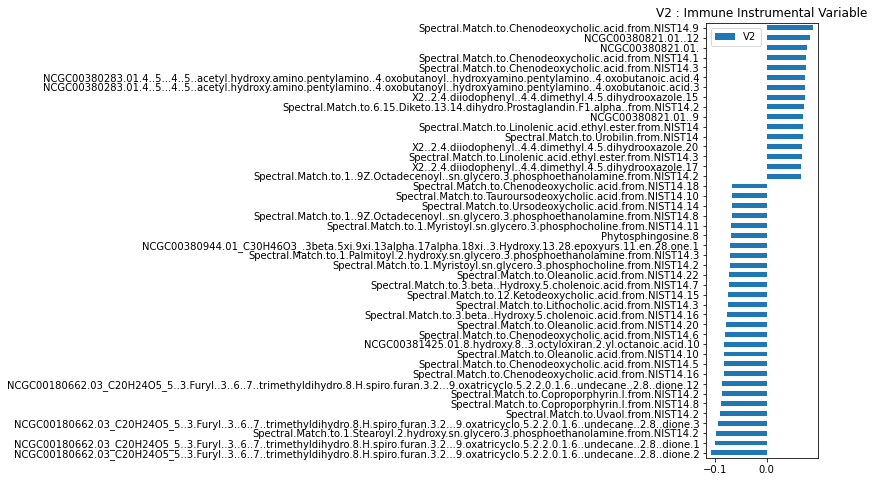

In [21]:
fig, ax = plt.subplots(figsize=(2, 8))
metabolite_ranks = metaboliteV['V2'].sort_values()
pd.DataFrame(metabolite_ranks.loc[np.abs(metabolite_ranks) > 0.065]).plot.barh(ax=ax)
ax.set_title('V2 : Immune Instrumental Variable')

In [22]:
denom = metabolite_ranks.loc[metabolite_ranks < 0].index
num = metabolite_ranks.loc[metabolite_ranks > 0].index
v = pd.DataFrame({'balance' : np.log(metabolites[num] + 1).mean(axis=1) - np.log(metabolites[denom] + 1).mean(axis=1)})
metadata = pd.merge(metadata, v, left_index=True, right_index=True)

Text(0.5, 0, 'obesity')

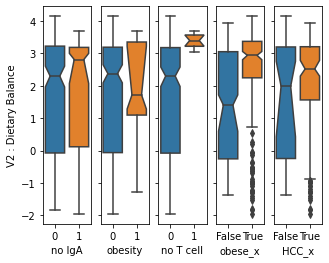

In [23]:
fig, ax = plt.subplots(1, 5, sharey=True, figsize=(5, 4))

sns.boxplot(data=metadata, y='balance', x='no IgA', notch=True, ax=ax[0], bootstrap=1000)
sns.boxplot(data=metadata, y='balance', x='no B cell', notch=True, ax=ax[1], bootstrap=1000)
sns.boxplot(data=metadata, y='balance', x='no T cell', notch=True, ax=ax[2], bootstrap=1000)
sns.boxplot(data=metadata, y='balance', x='obese_x', notch=True, ax=ax[3], bootstrap=1000)
sns.boxplot(data=metadata, y='balance', x='HCC_x', notch=True, ax=ax[4], bootstrap=1000)

ax[0].set_ylabel('V2 : Dietary Balance')
for i in range(1, 5):
    ax[i].set_ylabel('')
ax[1].set_xlabel('obesity')

In [24]:
deseq2 = pd.read_csv('../results/deseq_metabolites.csv', index_col=0)
# deseq2 = pd.merge(deseq2, metabolite_md, 
deseq2_obese = deseq2.loc[deseq2['Phenotype'] == 'obese']
#deseq2_obese = deseq2_obese.set_index('Variable')

deseq2_HCC = deseq2.loc[deseq2['Phenotype'] == 'HCC']
#deseq2_HCC = deseq2_HCC.set_index('Variable')

# Merged microbe-metabolite datasets

In [ ]:
mmV = pd.read_excel('../results/microb_metabolites_analysis (1).xlsx', 
                    sheet_name='Figure V', index_col=0)

microbe_fmd = pd.read_excel('../results/microb_metabolites_analysis (1).xlsx', 
                    sheet_name='microbiome_meta', index_col=0)
metabolite_fmd = pd.read_excel('../results/microb_metabolites_analysis (1).xlsx', 
                               sheet_name='Metabolites_meta', index_col=0)

microbe_fmd['OTUID'] = list(map(lambda x: int(str(x)[1:]), microbe_fmd.index))

In [26]:
bname = 'V3'
metabolite_ranks = metaboliteV2[bname].sort_values()
denom = metabolite_ranks.loc[metabolite_ranks < 0].index
num = metabolite_ranks.loc[metabolite_ranks > 0].index
v = pd.DataFrame({
    f'metabolite{bname}' : np.log(metabolites[num] + 1).mean(axis=1) - np.log(metabolites[denom] + 1).mean(axis=1)
})
metabolite_samp_md = pd.merge(metadata, v, left_index=True, right_index=True)

Text(0.5, 1.0, 'V2 : Immune Instrumental Variable')

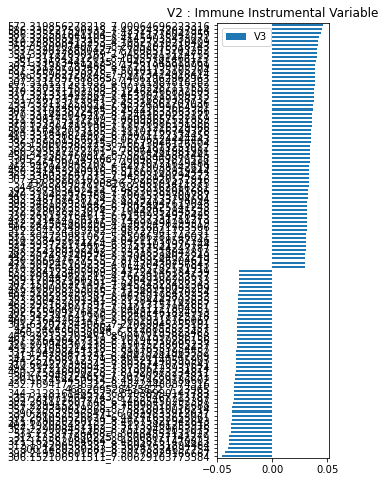

In [27]:
fig, ax = plt.subplots(figsize=(2, 8))
pd.DataFrame(metabolite_ranks.loc[np.abs(metabolite_ranks) > 0.03]).plot.barh(ax=ax)
ax.set_title('V2 : Immune Instrumental Variable')

Text(0.5, 0, 'obesity')

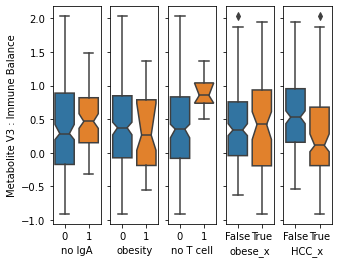

In [28]:
fig, ax = plt.subplots(1, 5, sharey=True, figsize=(5, 4))

sns.boxplot(data=metabolite_samp_md, y=f'metabolite{bname}', x='no IgA', notch=True, ax=ax[0], bootstrap=1000)
sns.boxplot(data=metabolite_samp_md, y=f'metabolite{bname}', x='no B cell', notch=True, ax=ax[1], bootstrap=1000)
sns.boxplot(data=metabolite_samp_md, y=f'metabolite{bname}', x='no T cell', notch=True, ax=ax[2], bootstrap=1000)
sns.boxplot(data=metabolite_samp_md, y=f'metabolite{bname}', x='obese_x', notch=True, ax=ax[3], bootstrap=1000)
sns.boxplot(data=metabolite_samp_md, y=f'metabolite{bname}', x='HCC_x', notch=True, ax=ax[4], bootstrap=1000)

ax[0].set_ylabel(f'Metabolite {bname} : Immune Balance')
for i in range(1, 5):
    ax[i].set_ylabel('')
ax[1].set_xlabel('obesity')

In [29]:
bname = 'V3'
microbe_ranks = microbeV2[bname].sort_values()
denom = microbe_ranks.loc[microbe_ranks < 0].index
num = microbe_ranks.loc[microbe_ranks > 0].index
v = pd.DataFrame({
    f'microbe{bname}' : np.log(family[num] + 1).mean(axis=1) - np.log(family[denom] + 1).mean(axis=1)
})
microbe_samp_md = pd.merge(microbe_md, v, left_index=True, right_index=True)

# Cross-reference against MMvec

In [36]:
metabolite_fmd

,sampleid,Intercept,diet.T.NC.,mz,rt,nearest_distance,scan,Adduct,CAS_Number,Charge,...,motif_478,motif_338,gnps_motif_43.m2m.http...ms2lda.org.motifdb.motif.151021.Water.loss...indicative.of.a.free.hydroxyl.group....in.beer.often.seen.in.sugary.structures.,motif_388,motif_306,gnps_motif_38.m2m.http...ms2lda.org.motifdb.motif.151045.Loss.of.CH2O2...indicative.for.underivatized.carboxilic.acid.group,motif_559,motif_451,motif_443,motif_469
1,357.278921944848_6.78255773651635,6.639105,1.608602,357.278922,406.953464,7.800464,1573.0,M+H-2H2O,474259,1.0,...,False,False,False,False,False,False,False,False,False,False
2,375.289157255286_6.79100745149911,6.507710,-0.640123,375.289157,407.460447,5.057447,2913.0,M+H-H2O,83498,1.0,...,False,False,False,False,False,False,False,False,False,True
3,373.273770443826_5.10086137440758,6.333313,-0.131551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
4,373.273686528335_4.84083244725738,6.188790,-0.026041,373.273687,290.449947,9.800209,2573.0,M+H,NaN,1.0,...,False,False,False,False,False,False,False,False,False,False
5,391.284342734904_6.30942060301507,5.712242,-0.436180,391.284343,378.565236,6.526236,3527.0,M+H,5130290,1.0,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11930,361.272818801043_8.38321917077176,-0.903152,-0.089544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
11931,545.791125197703_3.36571988382483,-0.781770,-0.546678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
11932,330.269609799664_6.23307150537634,-0.727299,-0.794258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
11933,584.36345704229_3.78418134199134,-0.561481,-0.732218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False


In [32]:
mmvec_metab = res.samples.loc[]

,0,1,2
357.278921944848_6.78255773651635,-1.722155,4.706219,-0.552918
375.289157255286_6.79100745149911,-0.539227,0.735454,1.023065
373.273770443826_5.10086137440758,-0.231913,0.325675,1.097716
373.273686528335_4.84083244725738,-0.170424,0.304913,0.741708
391.284342734904_6.30942060301507,-0.489158,0.963352,1.744764
...,...,...,...
361.272818801043_8.38321917077176,-0.158953,-0.168086,-0.853741
545.791125197703_3.36571988382483,-0.469077,0.508547,-0.184556
330.269609799664_6.23307150537634,-0.535891,-0.196944,0.299635
584.36345704229_3.78418134199134,-0.529412,0.604712,-0.133094
